# EGS master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_egs_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_egs_20171113.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


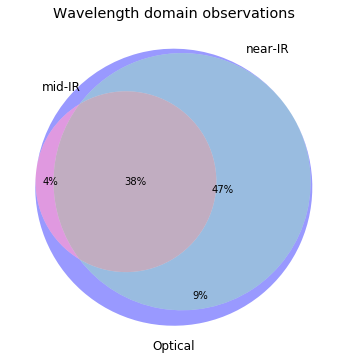

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical' ),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

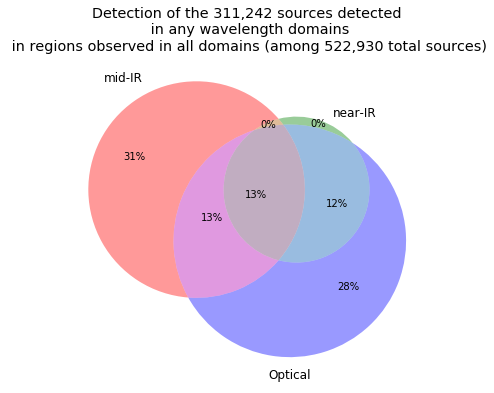

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det[flag_obs == 7] != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains\n in regions observed in all domains "
          "(among {} total sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["Megacam u"]
g_bands = ["Megacam g",              "GPC1 g"] #No Suprime g?
r_bands = ["Megacam r", "SUPRIME r", "GPC1 r"]
i_bands = ["Megacam i", "SUPRIME i", "GPC1 i"]
z_bands = ["Megacam z", "SUPRIME z", "GPC1 z"]
y_bands = [             "SUPRIME y", "GPC1 y"]
#TODO look at narrow hst bands. Also many other ugrizy bands

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

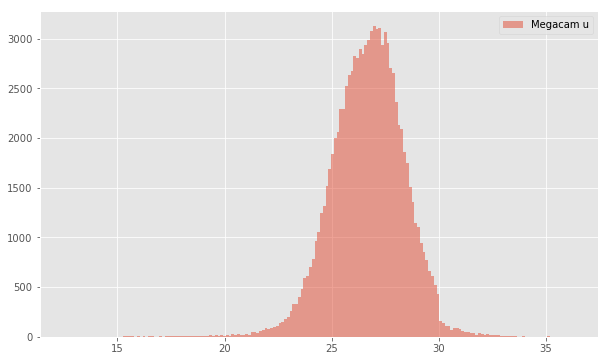

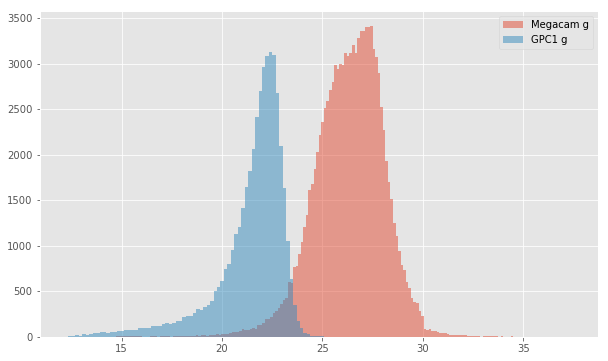

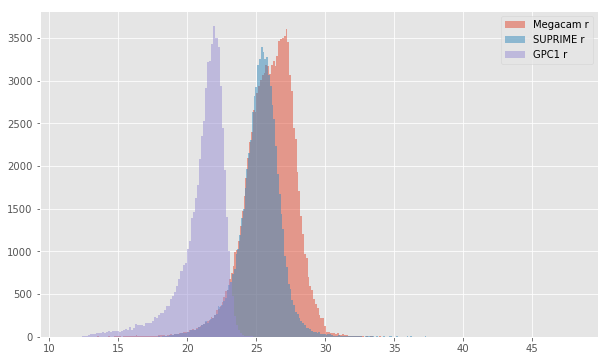

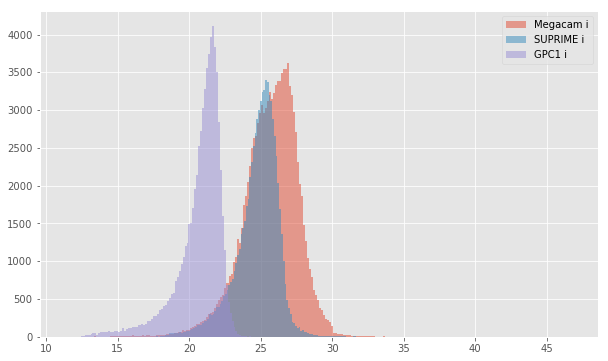

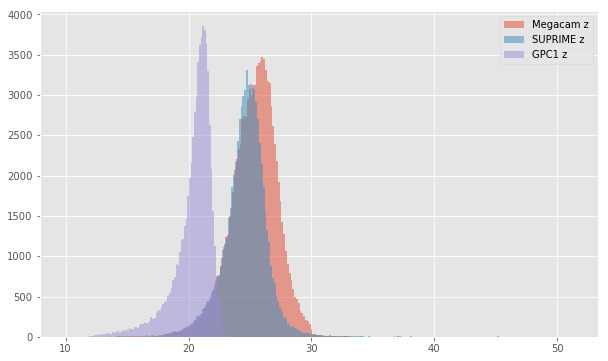

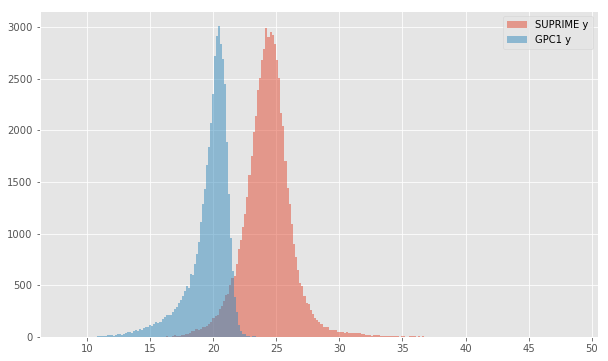

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.28
- Median Absolute Deviation: 0.31
- 1% percentile: -1.928706855773926
- 99% percentile: 1.9530365753173815


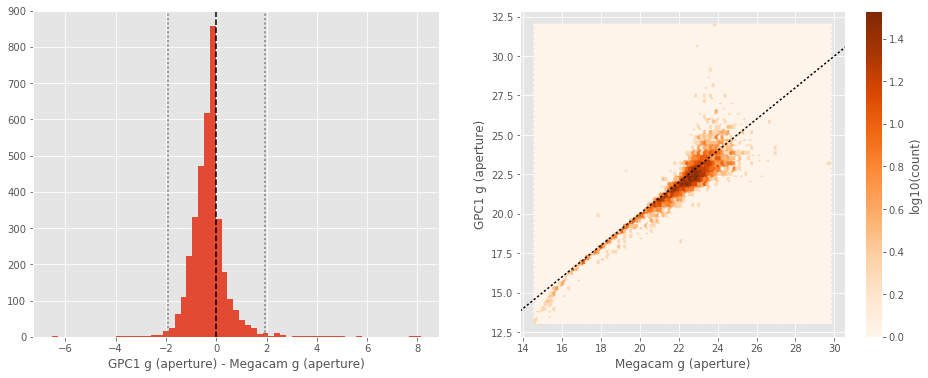

GPC1 g (total) - Megacam g (total):
- Median: 0.05
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2221992492675782
- 99% percentile: 0.94006004333496


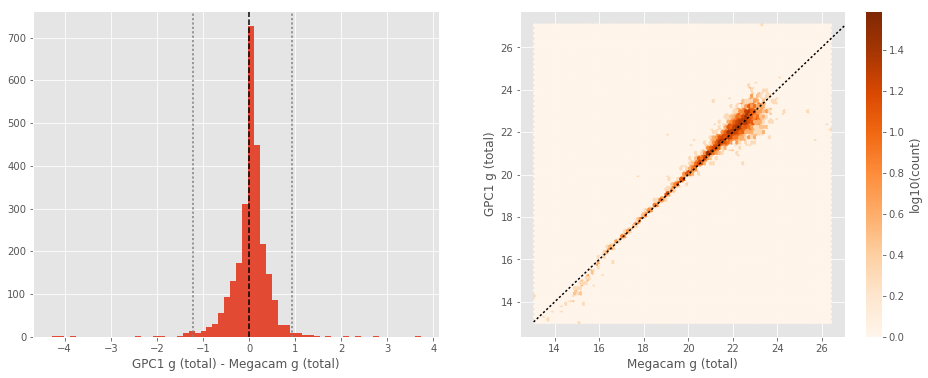

SUPRIME r (aperture) - Megacam r (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9163855743408204
- 99% percentile: 1.6759407043457046


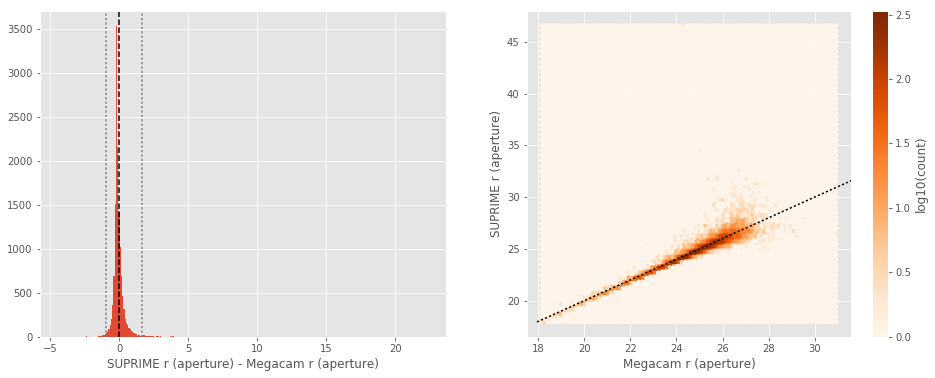

SUPRIME r (total) - Megacam r (total):
- Median: 0.01
- Median Absolute Deviation: 0.16
- 1% percentile: -1.539381217956543
- 99% percentile: 2.074096450805661


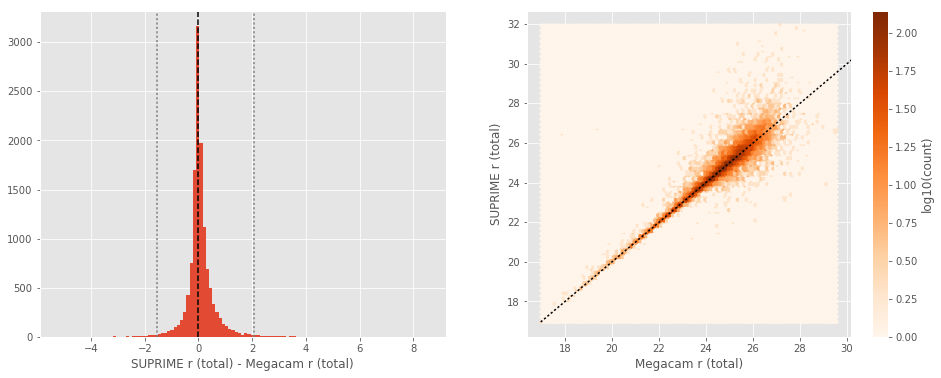

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.276611862182617
- 99% percentile: 1.6737678527832105


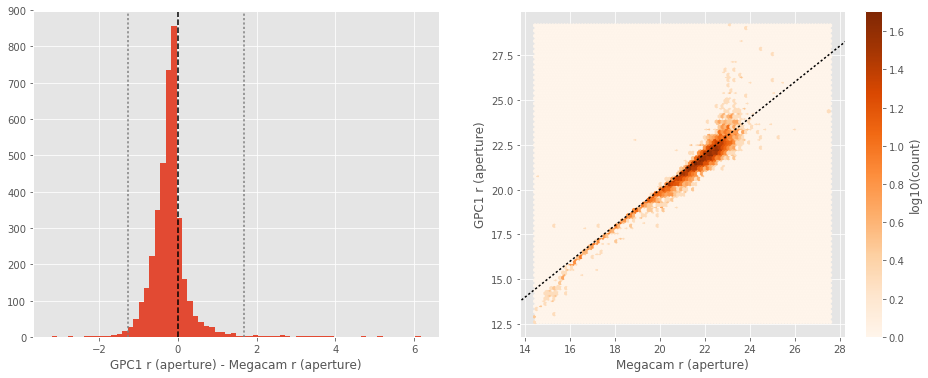

GPC1 r (total) - Megacam r (total):
- Median: 0.10
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6867600440979003
- 99% percentile: 0.8232704162597622


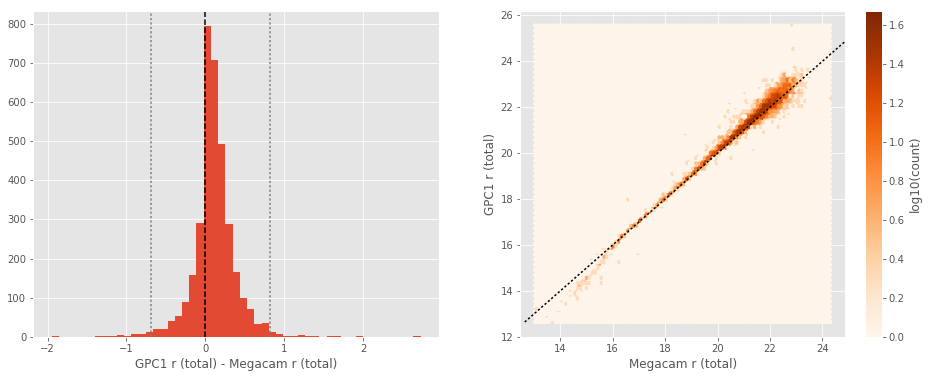

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.23
- 1% percentile: -1.2134175300598145
- 99% percentile: 1.6542343711853023


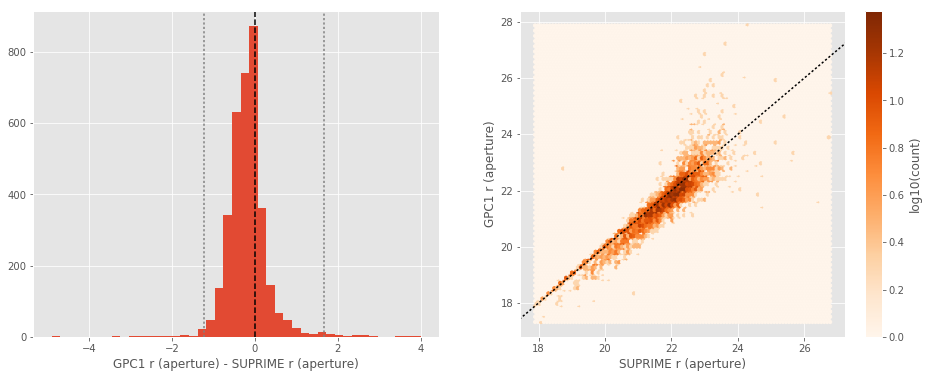

GPC1 r (total) - SUPRIME r (total):
- Median: 0.07
- Median Absolute Deviation: 0.13
- 1% percentile: -0.7163006591796874
- 99% percentile: 0.788396911621095


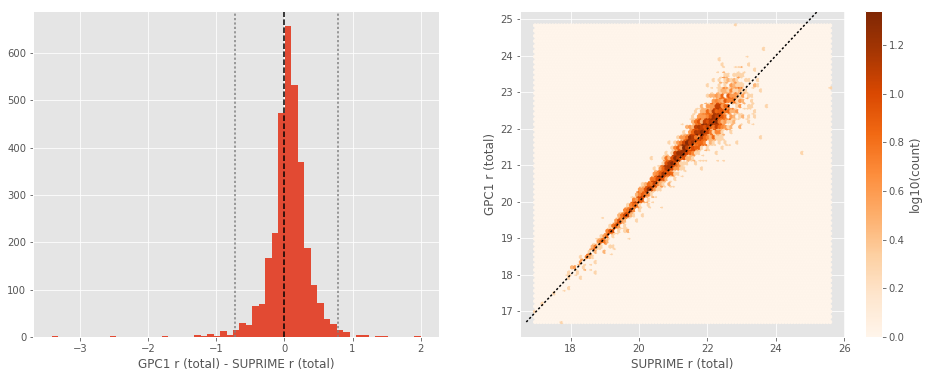

SUPRIME i (aperture) - Megacam i (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7965199470520019
- 99% percentile: 0.9968648147583008


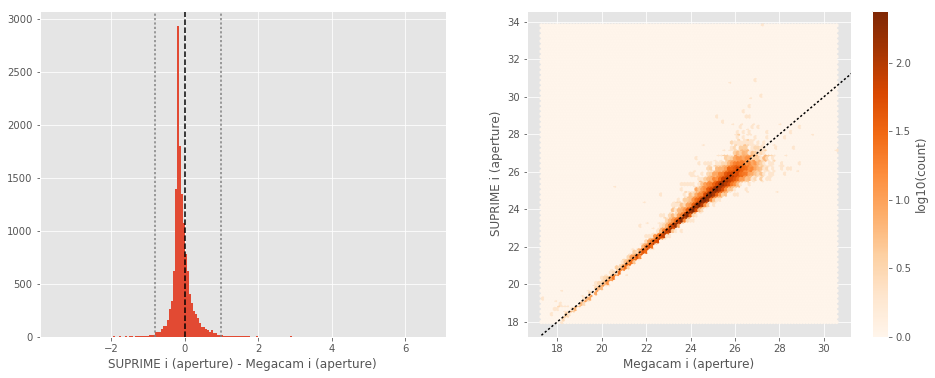

SUPRIME i (total) - Megacam i (total):
- Median: -0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3335563850402832
- 99% percentile: 1.8080987548828107


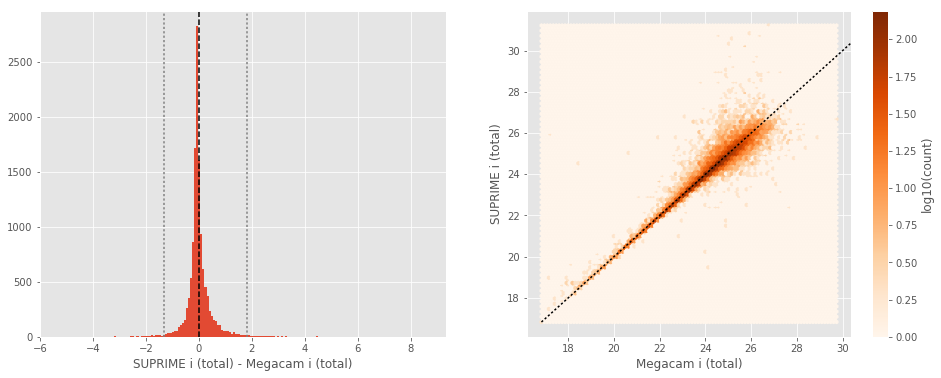

GPC1 i (aperture) - Megacam i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1855758666992187
- 99% percentile: 0.7440419387817383


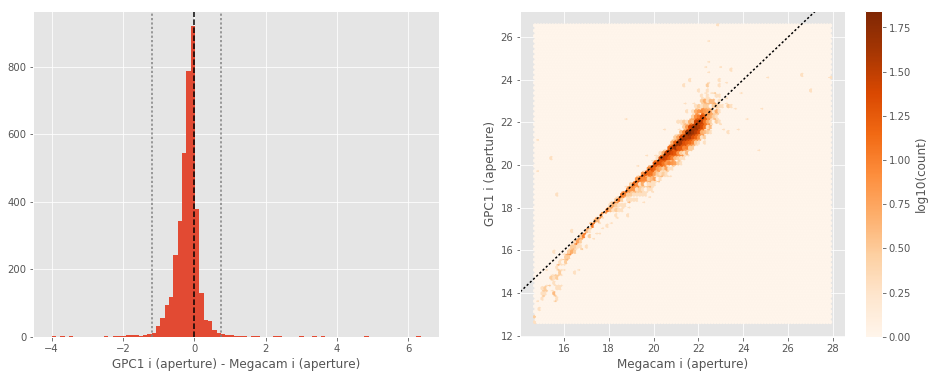

GPC1 i (total) - Megacam i (total):
- Median: 0.16
- Median Absolute Deviation: 0.09
- 1% percentile: -0.6929055976867676
- 99% percentile: 0.7870205211639406


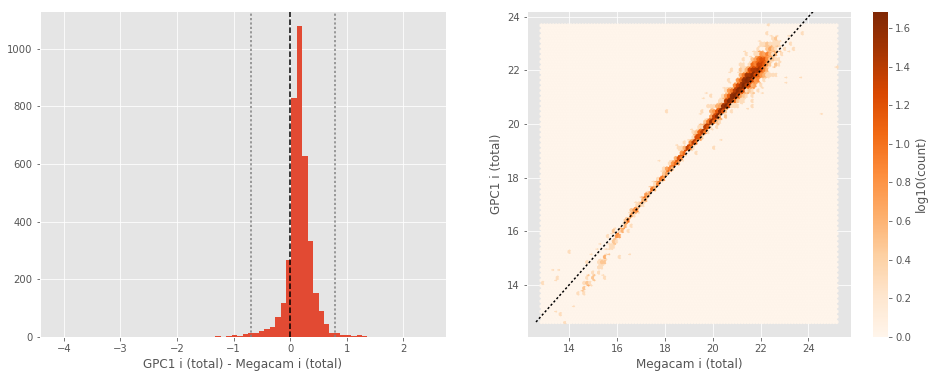

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.21
- 1% percentile: -1.1623632431030275
- 99% percentile: 0.7254737091064454


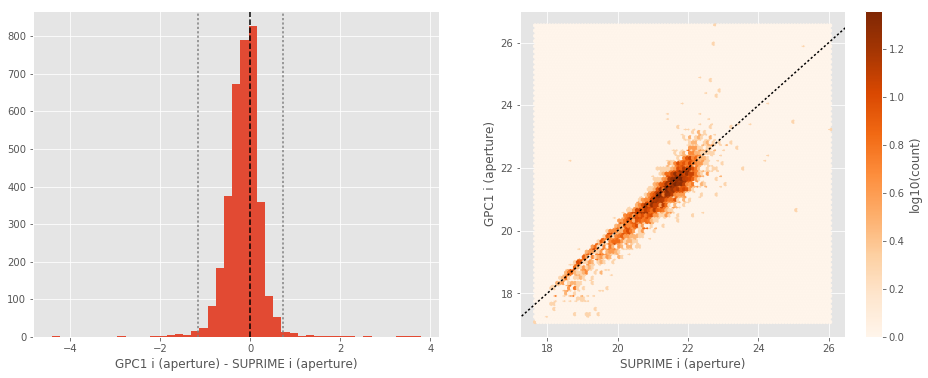

GPC1 i (total) - SUPRIME i (total):
- Median: 0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9023385620117188
- 99% percentile: 0.7221340179443361


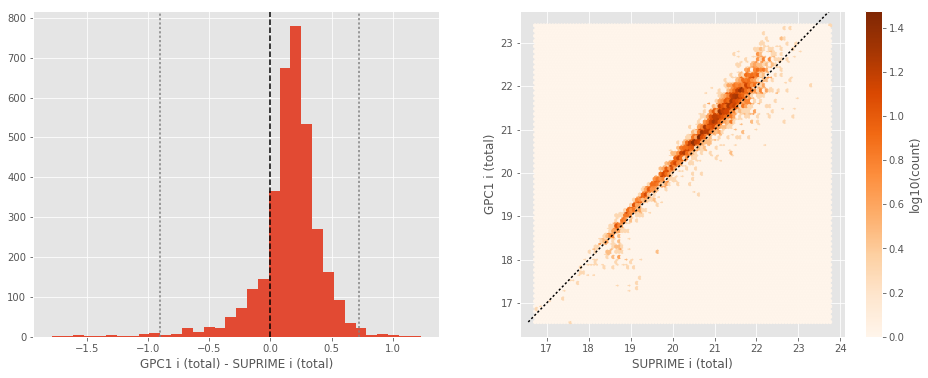

SUPRIME z (aperture) - Megacam z (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5736556816101073
- 99% percentile: 1.9439070320129412


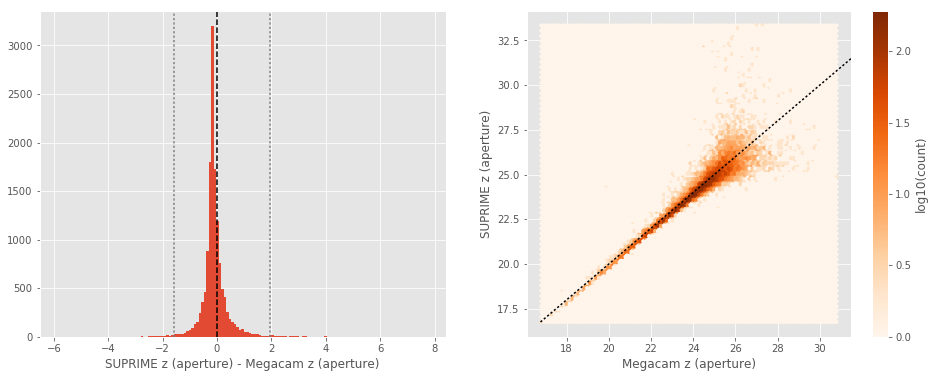

SUPRIME z (total) - Megacam z (total):
- Median: -0.01
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9970068359375
- 99% percentile: 2.2349632263183583


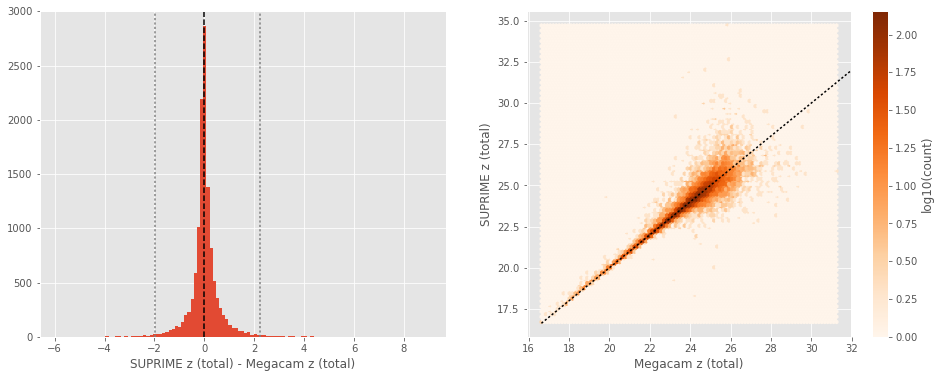

GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0149077796936035
- 99% percentile: 0.8146115493774411


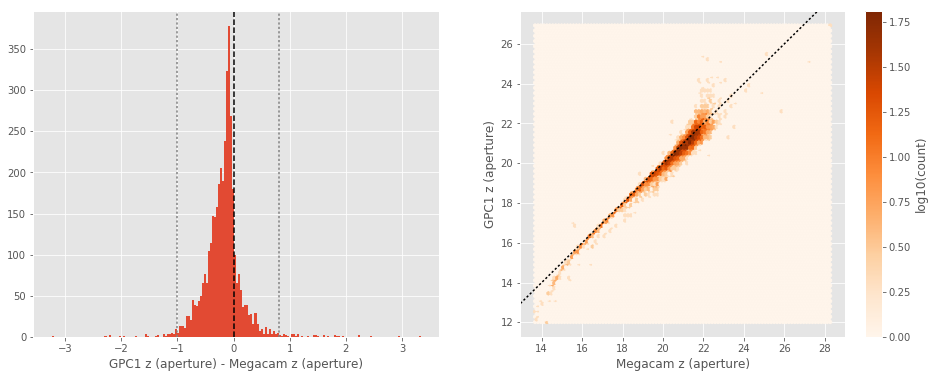

GPC1 z (total) - Megacam z (total):
- Median: 0.14
- Median Absolute Deviation: 0.10
- 1% percentile: -0.5984981155395507
- 99% percentile: 0.8271747207641601


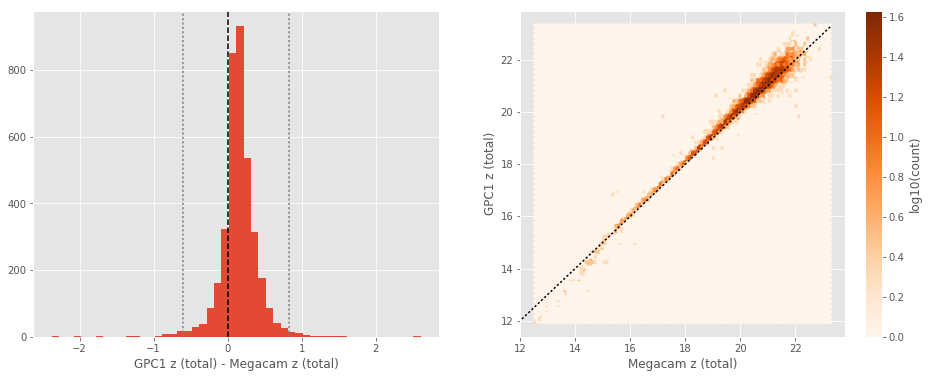

GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.20
- 1% percentile: -0.9266522598266601
- 99% percentile: 0.9107172966003411


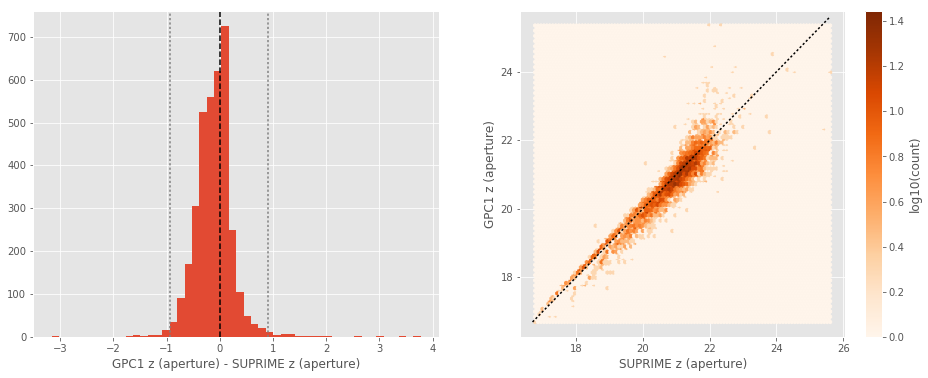

GPC1 z (total) - SUPRIME z (total):
- Median: 0.14
- Median Absolute Deviation: 0.12
- 1% percentile: -0.6220054817199707
- 99% percentile: 0.7379940414428705


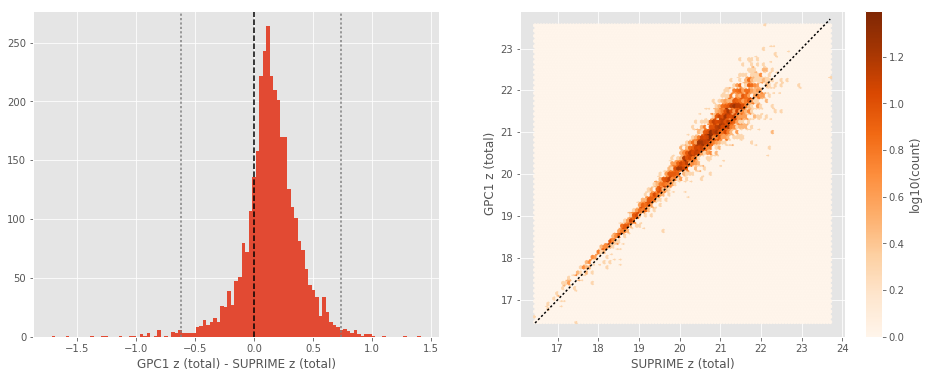

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.27
- 1% percentile: -1.3209478187561037
- 99% percentile: 2.3031615447998046


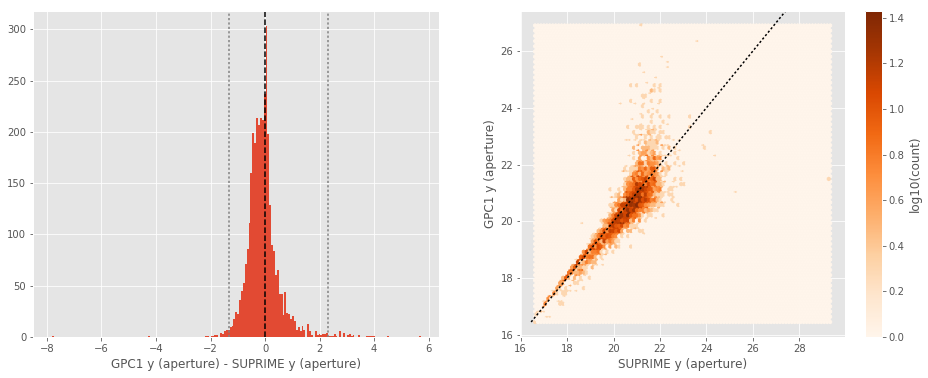

GPC1 y (total) - SUPRIME y (total):
- Median: 0.16
- Median Absolute Deviation: 0.17
- 1% percentile: -0.8766105651855469
- 99% percentile: 1.0357042694091814


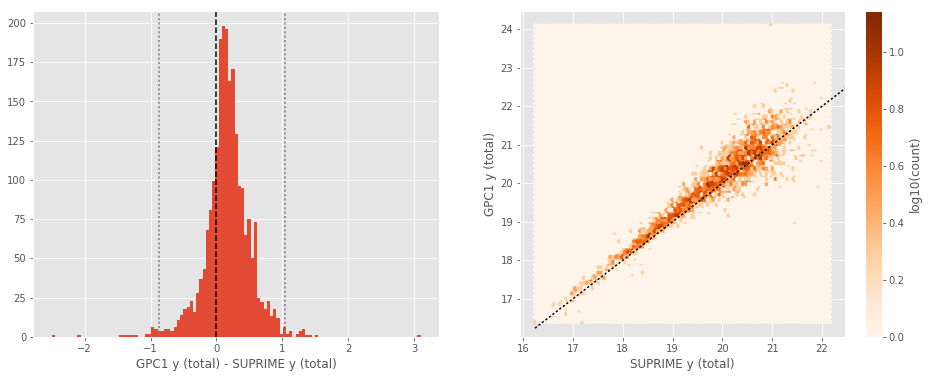

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_EGS.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.02
- Median Absolute Deviation: 0.50
- 1% percentile: -1.6068009948730468
- 99% percentile: 3.2189818572998043


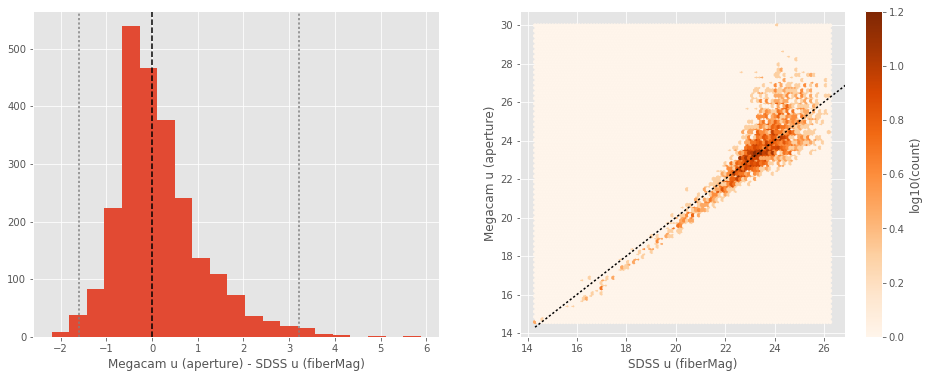

Megacam u (total) - SDSS u (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.50
- 1% percentile: -1.6068009948730468
- 99% percentile: 3.2189818572998043


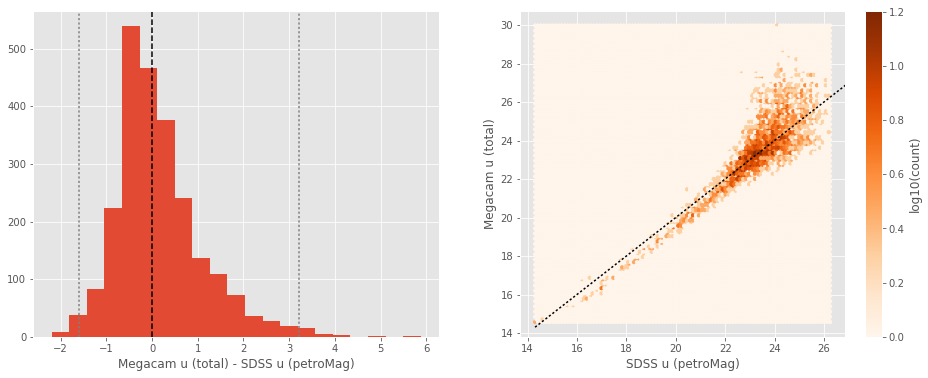

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.17
- 1% percentile: -1.10717679977417
- 99% percentile: 0.7175179481506326


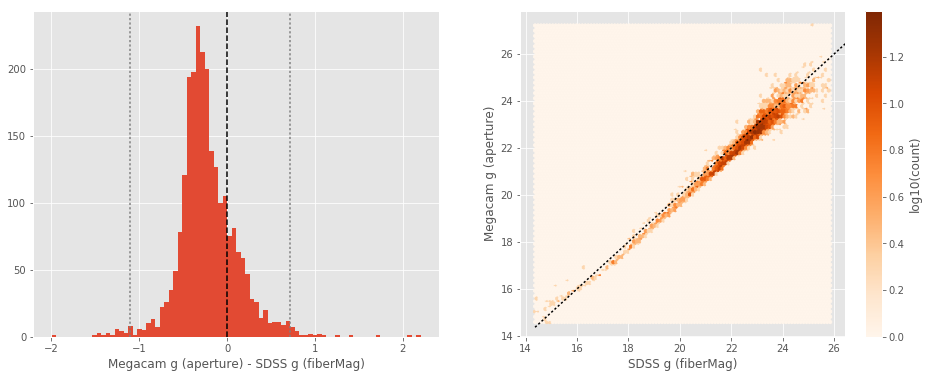

Megacam g (total) - SDSS g (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.17
- 1% percentile: -1.10717679977417
- 99% percentile: 0.7175179481506326


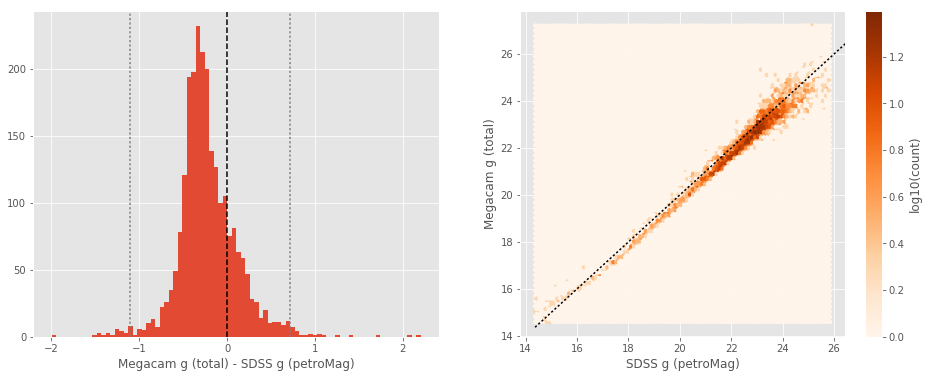

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.55
- Median Absolute Deviation: 0.25
- 1% percentile: -1.934288864135742
- 99% percentile: 1.9557939338684083


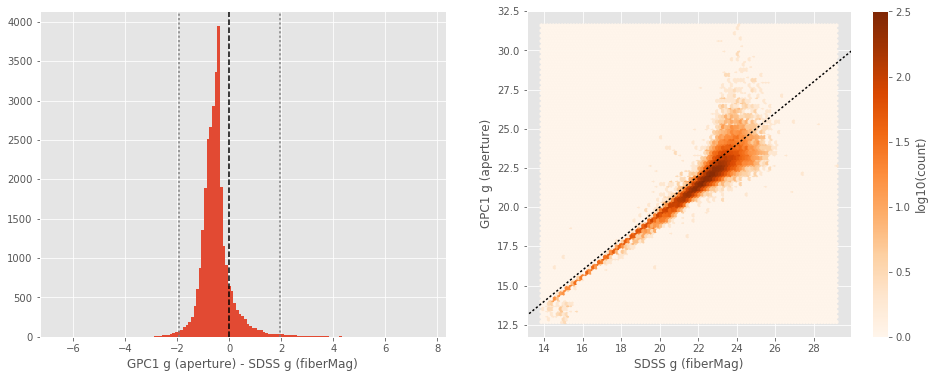

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.55
- Median Absolute Deviation: 0.25
- 1% percentile: -1.934288864135742
- 99% percentile: 1.9557939338684083


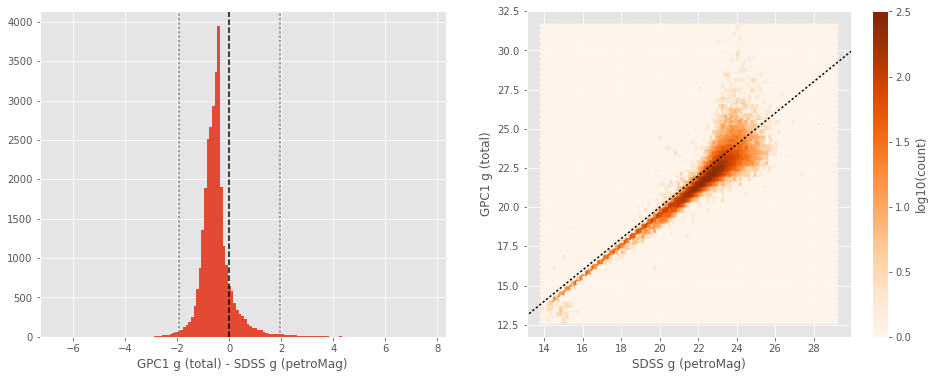

Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8136474990844726
- 99% percentile: 0.48804882049560566


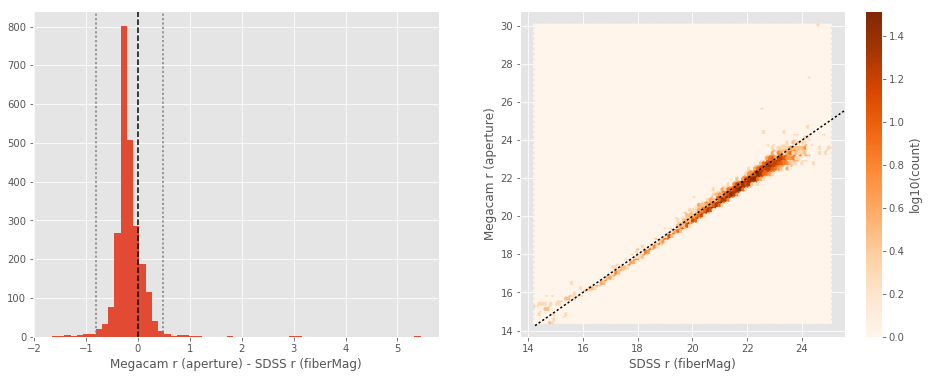

Megacam r (total) - SDSS r (petroMag):
- Median: -0.22
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8136474990844726
- 99% percentile: 0.48804882049560566


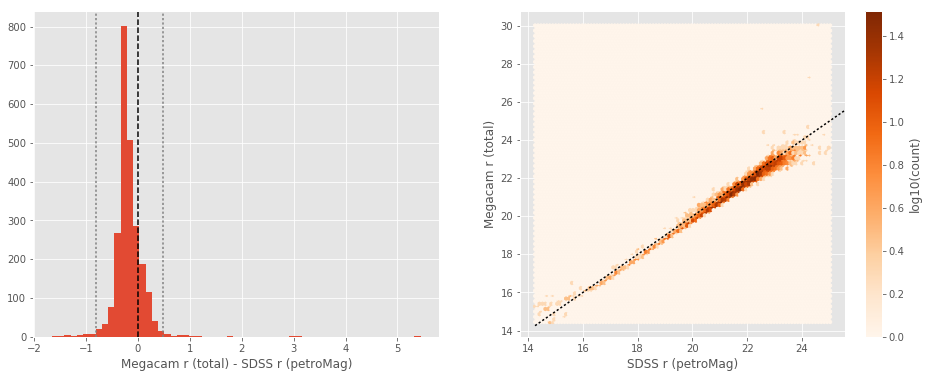

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9480966186523437
- 99% percentile: 0.38943458557128896


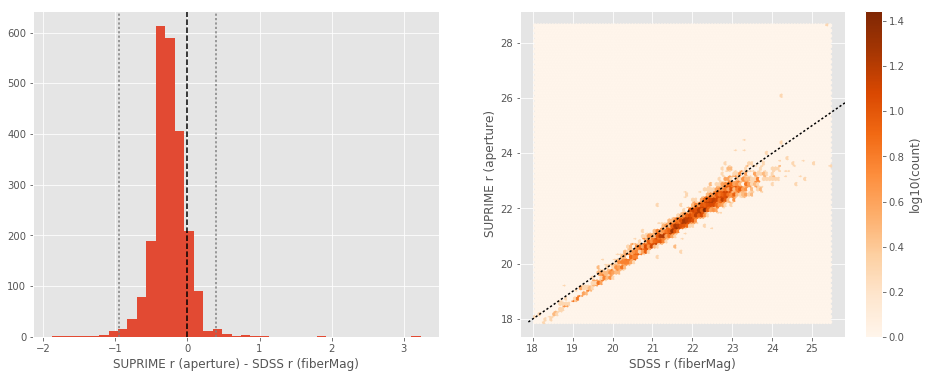

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9480966186523437
- 99% percentile: 0.38943458557128896


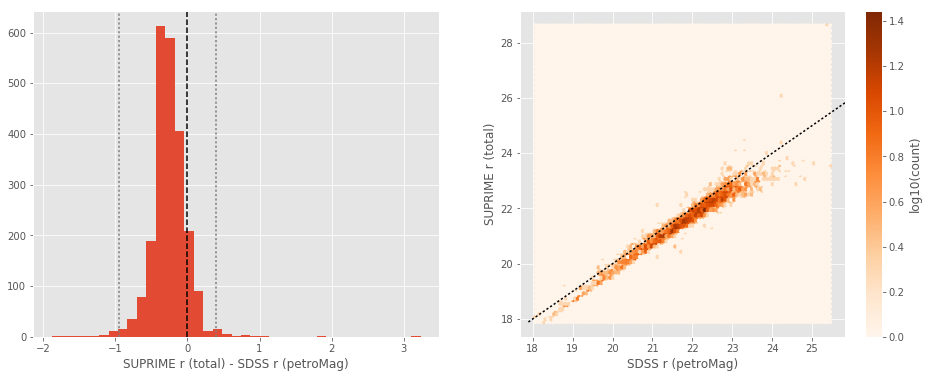

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.15
- 1% percentile: -1.3223583793640137
- 99% percentile: 1.003023033142091


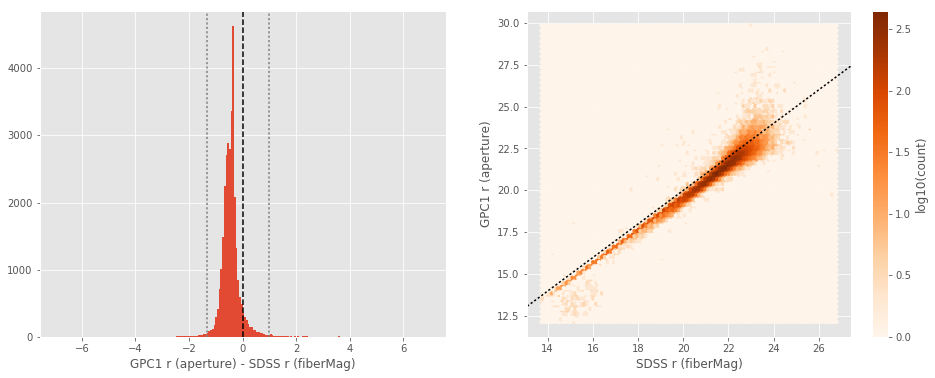

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.44
- Median Absolute Deviation: 0.15
- 1% percentile: -1.3223583793640137
- 99% percentile: 1.003023033142091


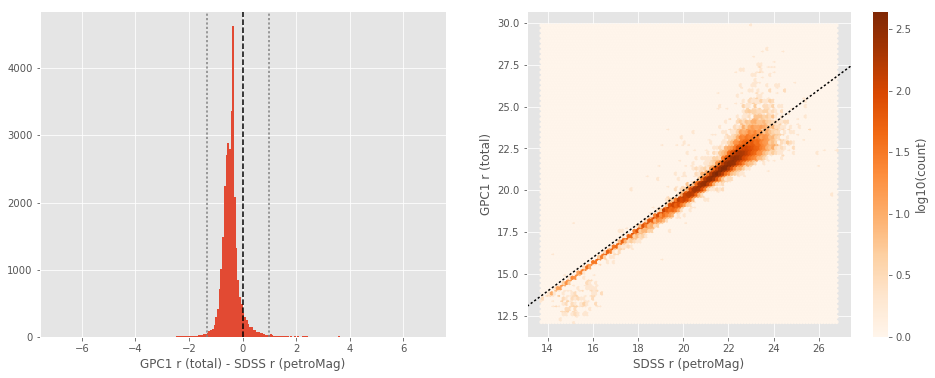

Megacam i (aperture) - SDSS i (fiberMag):
- Median: -0.25
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8433090019226074
- 99% percentile: 0.7165747070312496


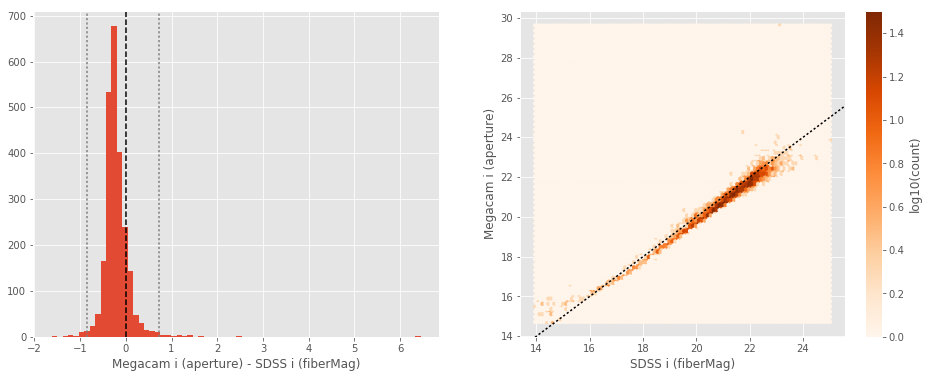

Megacam i (total) - SDSS i (petroMag):
- Median: -0.25
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8433090019226074
- 99% percentile: 0.7165747070312496


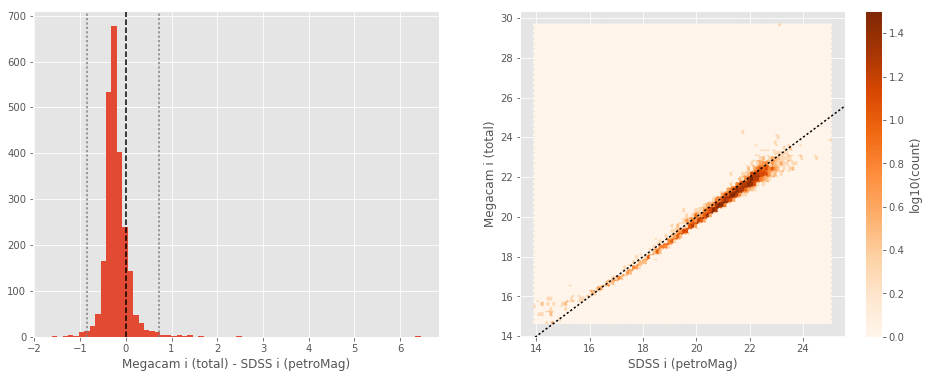

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8701487731933594
- 99% percentile: 0.5029161834716793


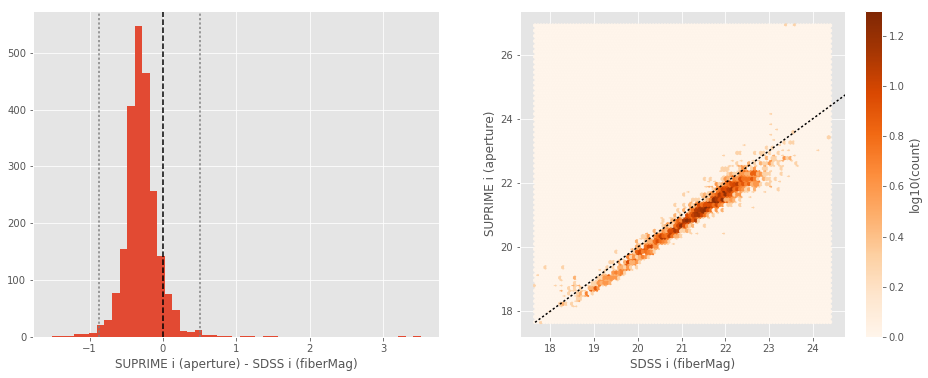

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.30
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8701487731933594
- 99% percentile: 0.5029161834716793


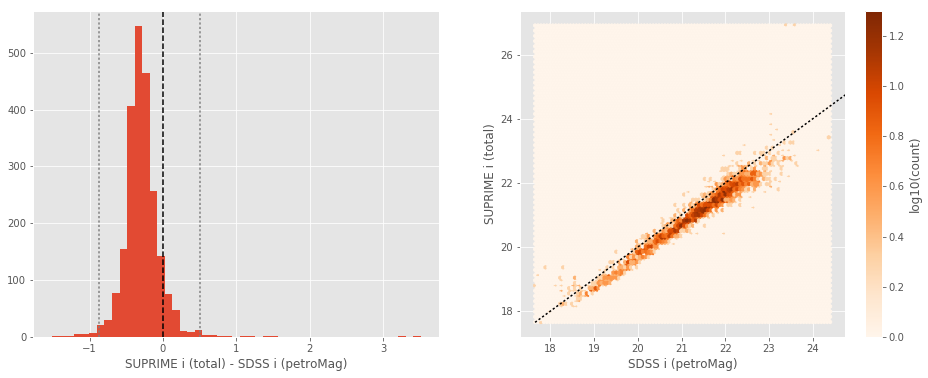

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9905657768249512
- 99% percentile: 0.33732242584228544


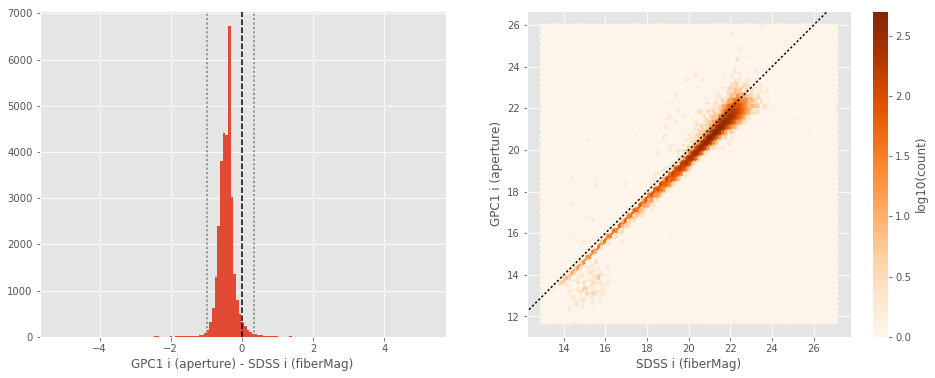

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9905657768249512
- 99% percentile: 0.33732242584228544


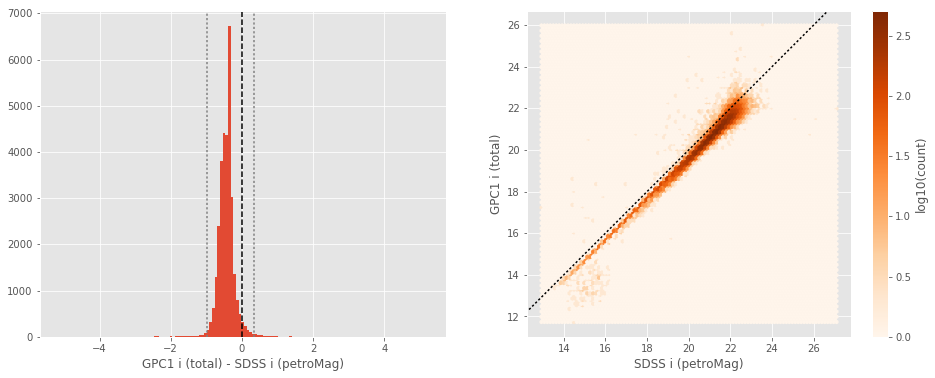

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -0.959480266571045
- 99% percentile: 0.9934403514862058


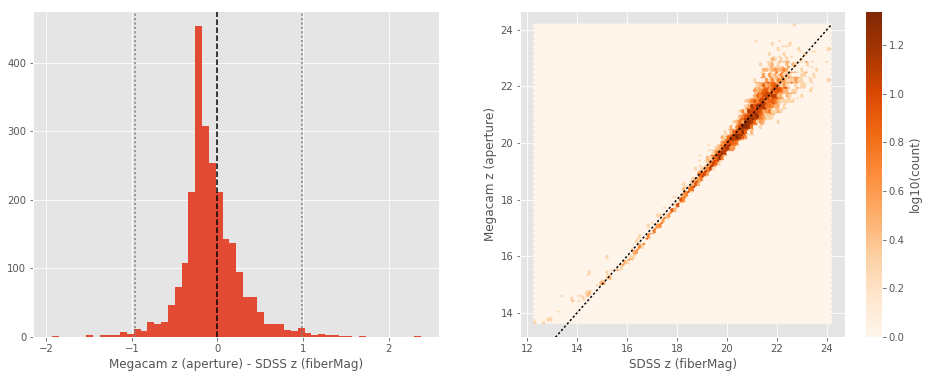

Megacam z (total) - SDSS z (petroMag):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -0.959480266571045
- 99% percentile: 0.9934403514862058


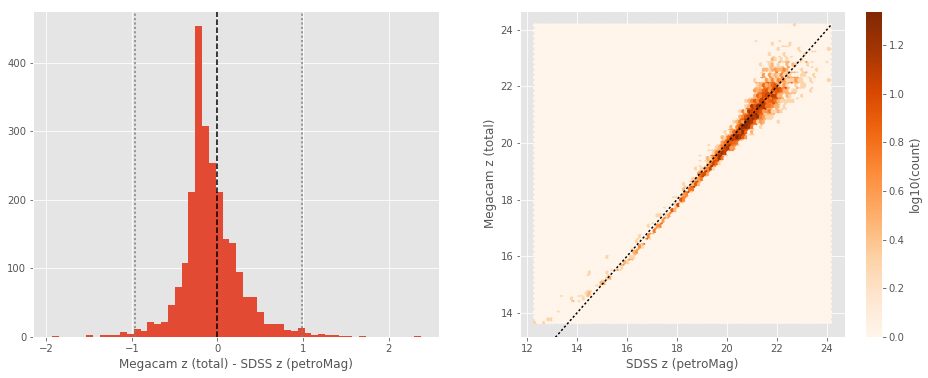

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.19
- Median Absolute Deviation: 0.19
- 1% percentile: -1.2495532989501952
- 99% percentile: 0.8408814239501934


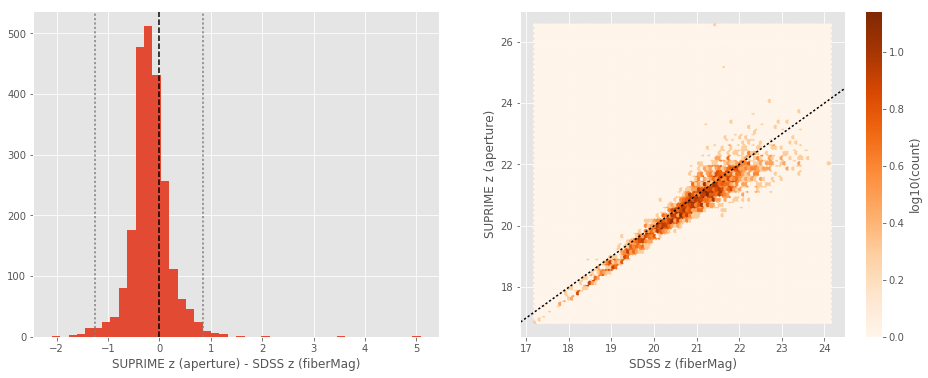

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.19
- Median Absolute Deviation: 0.19
- 1% percentile: -1.2495532989501952
- 99% percentile: 0.8408814239501934


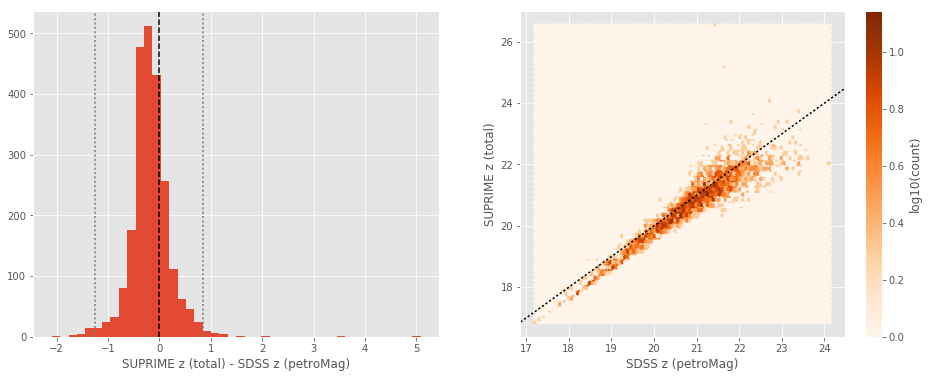

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2823964691162109
- 99% percentile: 0.7947852325439451


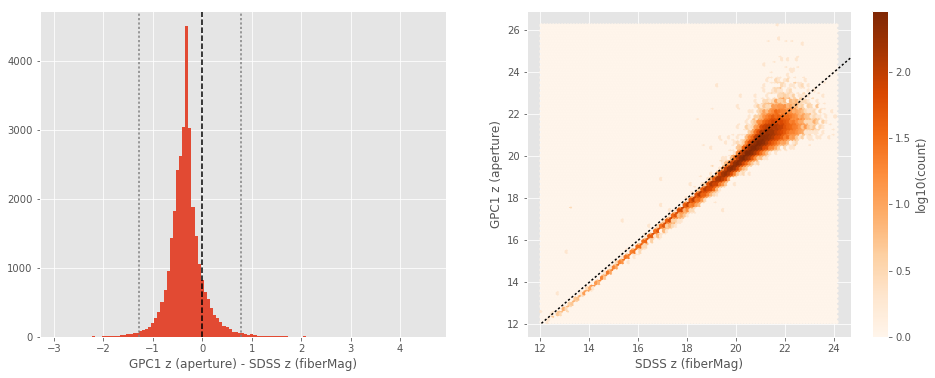

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2823964691162109
- 99% percentile: 0.7947852325439451


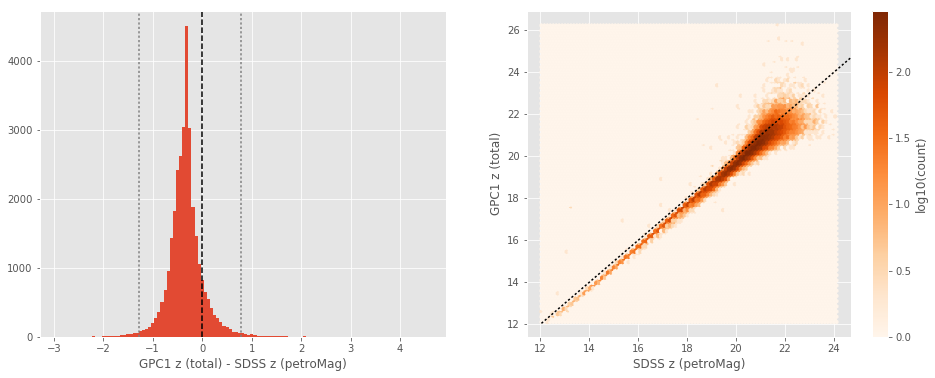

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the WIRCAM total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

2MASS and WIRCAM both use Ks so no conversion is required.

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_EGS.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WIRCAM J (total) - 2MASS J:
- Median: 0.01
- Median Absolute Deviation: 0.08
- 1% percentile: -20.52392908743875
- 99% percentile: 2.8143214563844854


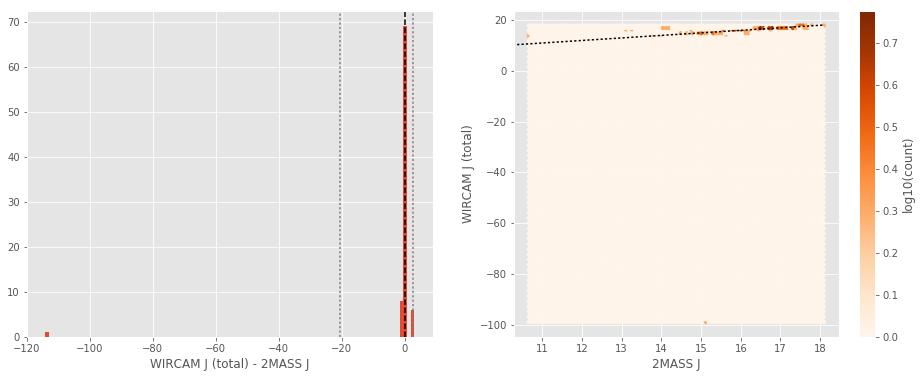

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wircam_j'][ml_twomass_idx],
                labels=("2MASS J", "WIRCAM J (total)"))

WIRCAM Ks (total) - 2MASS Ks:
- Median: -0.02
- Median Absolute Deviation: 0.11
- 1% percentile: -20.507179630113455
- 99% percentile: 2.584970815748355


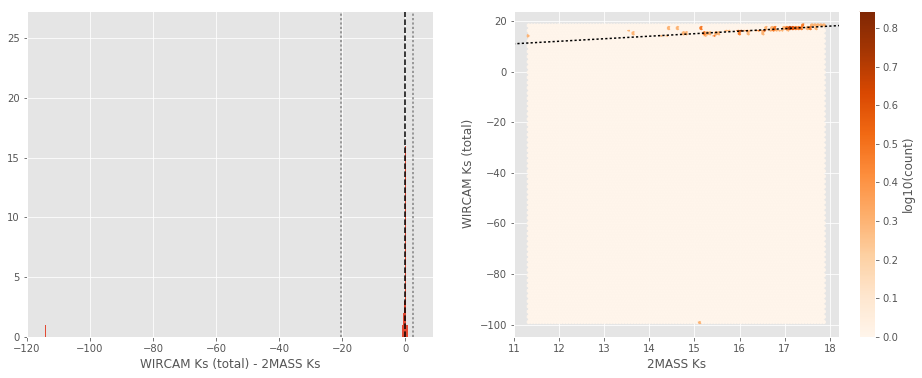

In [16]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_wircam_k'][ml_twomass_idx],
                labels=("2MASS Ks", "WIRCAM Ks (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 76861 / 522930 (14.70%)


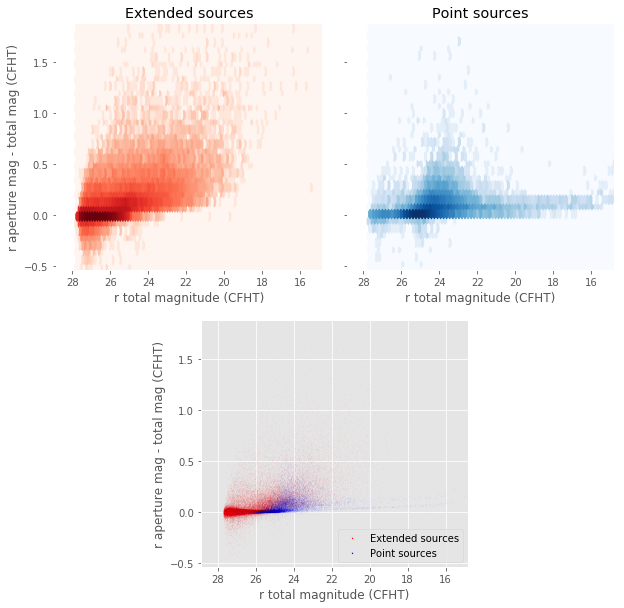

In [18]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 8035 / 522930 (1.54%)


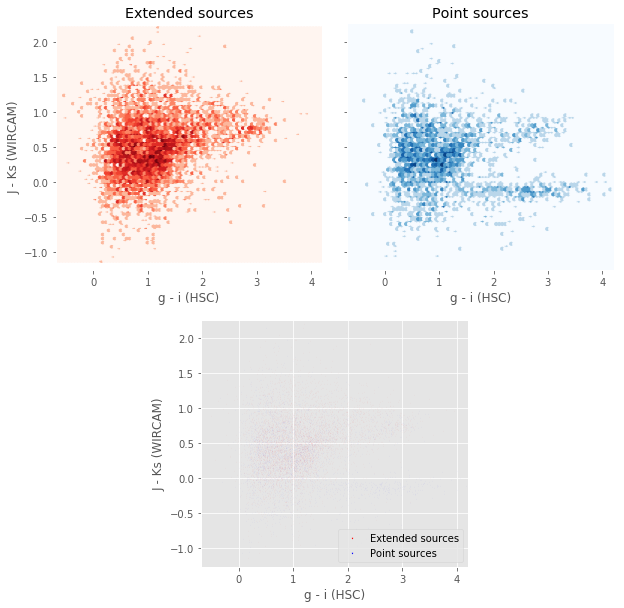

In [19]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_k'],
    "g - i (HSC)", "J - Ks (WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 18421 / 522930 (3.52%)


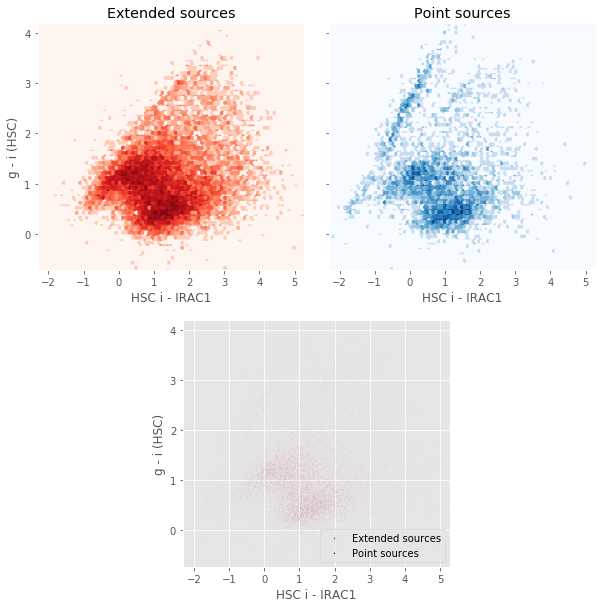

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_irac-egs_i1'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    "HSC i - IRAC1", "g - i (HSC)",
    master_catalogue["stellarity"]
)

Number of source used: 54127 / 522930 (10.35%)


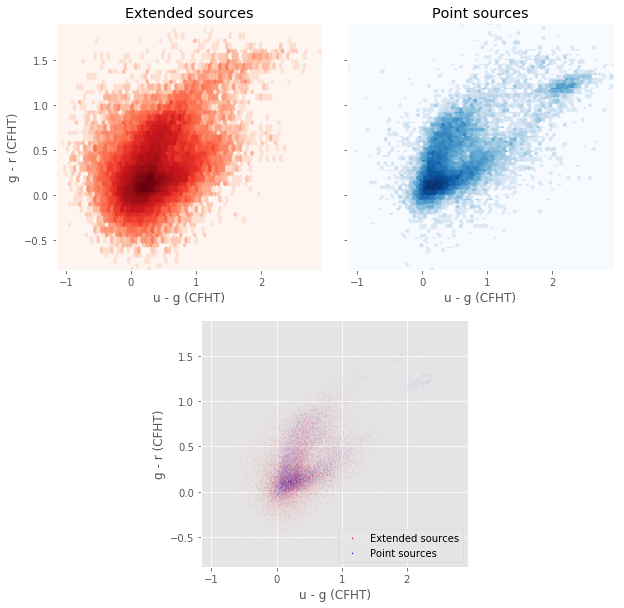

In [22]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 8299 / 522930 (1.59%)


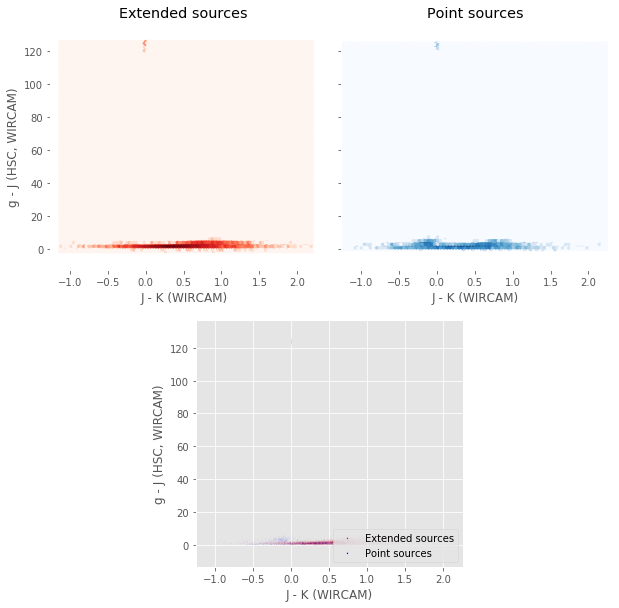

In [23]:
nb_ccplots(
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_wircam_j'],
    "J - K (WIRCAM)", "g - J (HSC, WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 21319 / 522930 (4.08%)


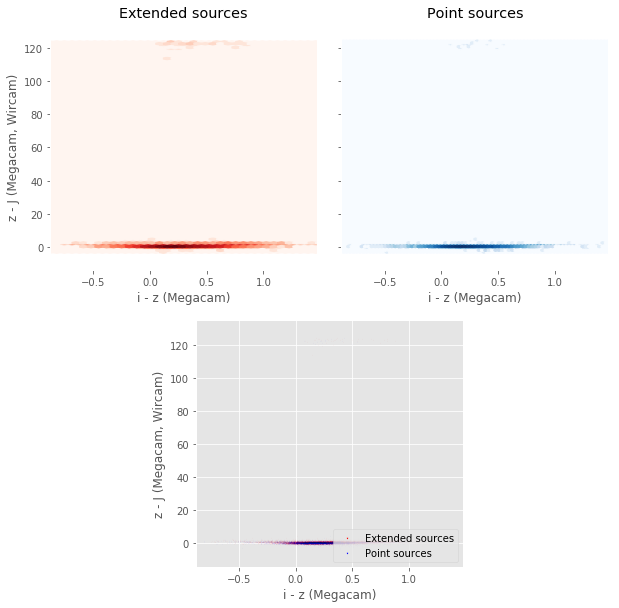

In [24]:
nb_ccplots(
    master_catalogue['m_megacam_i'] - master_catalogue['m_megacam_z'],
    master_catalogue['m_megacam_z'] - master_catalogue['m_wircam_j'],
    "i - z (Megacam)", "z - J (Megacam, Wircam)",
    master_catalogue["stellarity"]
)

Number of source used: 18047 / 522930 (3.45%)


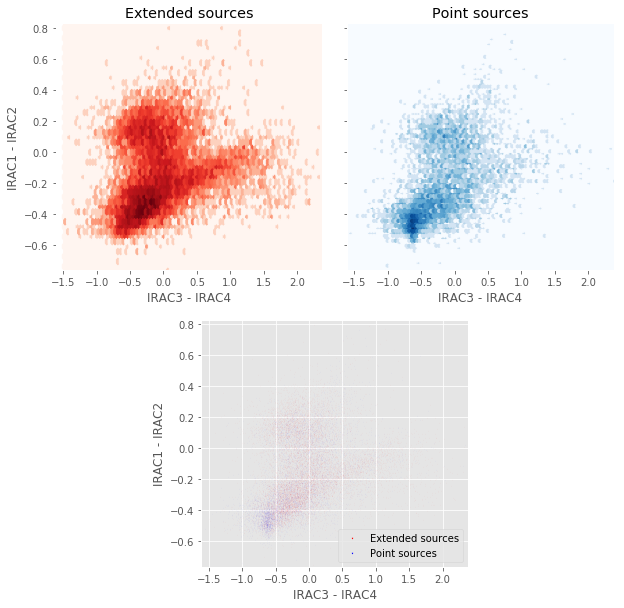

In [25]:
nb_ccplots(
    master_catalogue['m_irac-egs_i3'] - master_catalogue['m_irac-egs_i4'],
    master_catalogue['m_irac-egs_i1'] - master_catalogue['m_irac-egs_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)